# Keras

In [1]:
import tensorflow.keras as keras; 
import tensorflow as tf; 

import numpy as np
import pandas as pd

from matplotlib import pyplot

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from datetime import datetime

print("Versão Keras :" , keras.__version__)
print("Versão Tensorflow :" , tf.__version__)

Versão Keras : 2.3.0-tf
Versão Tensorflow : 2.2.0


## Passos elementares para criar uma Rede Neural usando Keras
* Preparação dos dados de entrada e saída
* Definição das camadas 
    * Entrada e Saída
        * De acordo com a natureza do problema: regressão, classificação, multilabel, multiclasse, etc e shape dos dados
    * camadas escondidas
* Compilação
* Treino
* Avaliação
    * plot dos valores presentes no objeto history

In [2]:
#path = 'pima-indians-diabetes.csv'
path = 'ionosphere.csv'
#path='perceptron_toydata.txt'
df = pd.read_csv(path)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [3]:
X=df.values[:, :-1]
y=df.values[:, -1]

y = y.astype(int)

sc2 = StandardScaler()
X = sc2.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
print(X.shape)

(351, 34)


In [4]:
X

array([[ 0.34843328,  0.        ,  0.71237237, ..., -1.05505394,
        -0.3122206 , -0.99959483],
       [ 0.34843328,  0.        ,  0.72164805, ..., -0.11521328,
        -0.93260505, -0.08328554],
       [ 0.34843328,  0.        ,  0.72164805, ..., -0.46409249,
         0.40444328, -0.84859079],
       ...,
       [ 0.34843328,  0.        ,  0.61502805, ...,  0.01601615,
         1.10669878, -0.04330004],
       [ 0.34843328,  0.        ,  0.53267371, ..., -0.06586087,
         1.00526528, -0.37828012],
       [ 0.34843328,  0.        ,  0.41400137, ..., -0.12281796,
         0.9738619 , -0.16248675]])

In [5]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
model = Sequential()

* Empilhando camadas (método add)

In [7]:
model.add(Dense(128, input_dim=(X_train.shape[1])))

In [8]:
model.add(Dense(64))
#model.add(Dropout(0.5))
#model.add(Dense(128))

In [9]:
#model.add(Dense(1, activation='softmax'))
model.add(Dense(1))

# compilando o modelo

* Loss para multiclasse
 * model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
* Loss para classificação binária
  * model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
* loss para regressao
    * model.compile(optimizer='rmsprop',
              loss='mse')

In [26]:
#model.compile(loss='binary_crossentropy',
#              optimizer='sgd',
#              metrics=['accuracy'])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              #loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [28]:
from tensorflow.keras.callbacks import TensorBoard

In [29]:
logDir = "/home/silvio/tb/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

history = model.fit(X_train, y_train, epochs=100, verbose=2, 
          callbacks=[tensorboard_callback])

Epoch 1/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 2/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 3/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 4/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 5/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 6/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 7/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 8/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 9/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 10/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 11/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 12/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 13/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 14/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 15/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 16/100
8/8 - 0s - loss: 7.4932e-08 - accuracy: 0.3061
Epoch 17/100
8/8 - 0s - loss: 7.4932e-08 - accura

## Avaliando desempenho do modelo treinado

* função evaluate que mostra o calos de loss e acurácia após o treino
* As métricas mais elementares são a curva de loss e a curva da métrica usada

In [ ]:
score = model.evaluate(X_test, y_test)

print(score)

fig, axs = pyplot.subplots(2)

fig.tight_layout(pad=3.0)

x=history.history['accuracy']
axs[0].plot(x)
axs[0].set_title('Acurácia')
axs[0].set(xlabel='Época')

x=history.history['loss']
axs[1].plot(x)
axs[1].set_title('Loss')
axs[1].set(xlabel='Época')

In [12]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 - 0s - loss: 613.6897 - mae: 23.4577 - mse: 613.6897 - val_loss: 617.4600 - val_mae: 23.6680 - val_mse: 617.4600
Epoch 2/100
8/8 - 0s - loss: 611.4199 - mae: 23.4024 - mse: 611.4199 - val_loss: 613.9802 - val_mae: 23.5944 - val_mse: 613.9802
Epoch 3/100
8/8 - 0s - loss: 607.9545 - mae: 23.3292 - mse: 607.9545 - val_loss: 610.4080 - val_mae: 23.5186 - val_mse: 610.

Epoch 59/100
8/8 - 0s - loss: 194.9610 - mae: 11.5125 - mse: 194.9610 - val_loss: 189.4470 - val_mae: 11.5138 - val_mse: 189.4470
Epoch 60/100
8/8 - 0s - loss: 187.2533 - mae: 11.1884 - mse: 187.2533 - val_loss: 181.6776 - val_mae: 11.1922 - val_mse: 181.6776
Epoch 61/100
8/8 - 0s - loss: 179.7316 - mae: 10.8639 - mse: 179.7316 - val_loss: 174.0713 - val_mae: 10.8674 - val_mse: 174.0713
Epoch 62/100
8/8 - 0s - loss: 172.3535 - mae: 10.5496 - mse: 172.3535 - val_loss: 166.6209 - val_mae: 10.5690 - val_mse: 166.6209
Epoch 63/100
8/8 - 0s - loss: 165.2074 - mae: 10.2528 - mse: 165.2074 - val_loss: 159.4782 - val_mae: 10.2759 - val_mse: 159.4782
Epoch 64/100
8/8 - 0s - loss: 158.1954 - mae: 9.9673 - mse: 158.1954 - val_loss: 152.2890 - val_mae: 9.9741 - val_mse: 152.2890
Epoch 65/100
8/8 - 0s - loss: 151.2739 - mae: 9.6748 - mse: 151.2739 - val_loss: 145.2984 - val_mae: 9.7114 - val_mse: 145.2984
Epoch 66/100
8/8 - 0s - loss: 144.5504 - mae: 9.4040 - mse: 144.5504 - val_loss: 138.5555 - va

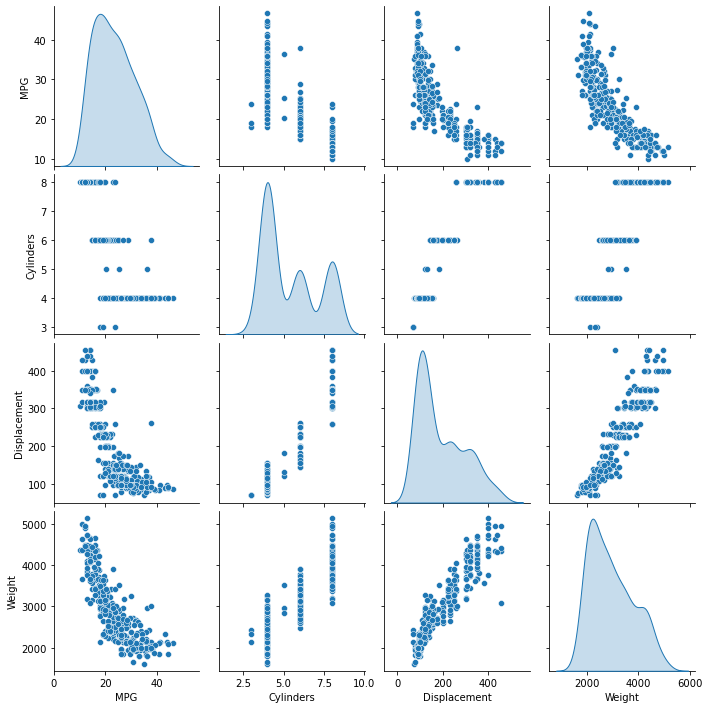

In [13]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")



train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()
model.summary()

EPOCHS = 100

logDir = "/home/silvio/tb/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logDir)

history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=2,
      callbacks=[tensorboard_callback])
